In [1]:
import pandas as pd 
import numpy as np
import copy
import matplotlib.pyplot as plt   
import seaborn as sns 
import sys

# 1. downsample the data set by reservoir sampling

In [2]:
a = open('w03-data.tbl', 'r')
reservoir =[] #initilazting a list 
reservoir_size=10 #I want the size of the reservoir to be 10 
element_number =0 #initialization
for line in a: #loop over each line of the file
    if line[0] == '#': continue #if the row starts with # ,ignore it 
    elif element_number < reservoir_size : #we add the 10 first gene to the reservoir 
        element_number = element_number+1 #each new line is a new element - need to keep track 
        reservoir.append(line)
        #print(len(reservoir)) #check
    elif reservoir_size<=element_number: 
        #print(line) #check
        element_number = element_number+1
        #print('the element number is ',element_number) #check
        random_r = np.random.choice(range(1,element_number)) #generation of random r between 1 and the element number
        #print('the chosen number between 1 is',random_r) #check
        if random_r<=reservoir_size : 
            #print('change') #check
            reservoir[random_r-1]=line.rsplit()  #swap if the condition is fullfiled -rsplit() to remove the /n at the end 
            #-1 because indexes start from 0 in python 
           
       
        
print(reservoir)  #final reservoir       

[['IFIT1', '50.2', '73.9', '44.1', '47.0', '77.0', '49.3', '74.4', '74.6', '50.4', '78.9', '76.2', '54.7', '75.8', '61.4', '51.1', '47.3', '56.4', '83.5', '43.6', '71.6'], ['RAB4B', '31.7', '61.6', '33.3', '32.1', '62.3', '30.4', '62.3', '63.7', '35.9', '62.9', '40.7', '66.3', '53.6', '53.1', '61.6', '43.8', '23.2', '67.1', '54.5', '55.8'], ['ZNF654', '82.9', '53.3', '83.6', '78.8', '51.7', '83.7', '52.4', '54.4', '82.5', '53.7', '81.3', '81.5', '74.5', '78.1', '65.5', '67.5', '72.6', '68.9', '70.7', '62.5'], ['MCF2L2', '48.6', '79.1', '48.5', '48.8', '80.2', '47.6', '76.7', '73.9', '52.4', '78.9', '80.2', '71.0', '58.3', '67.6', '74.1', '67.8', '51.0', '44.1', '87.3', '45.4'], ['PNMAL2', '82.8', '55.7', '86.5', '82.5', '58.3', '84.7', '54.1', '56.4', '82.1', '56.3', '50.0', '63.8', '86.1', '60.6', '82.4', '68.0', '56.9', '55.2', '62.7', '49.5'], ['UGT2B17', '15.0', '48.0', '15.9', '14.5', '44.8', '16.7', '45.5', '45.8', '16.8', '41.7', '19.9', '28.4', '15.2', '27.2', '51.1', '55.7', '

# 2. look at outliers; validate the formatting
# 3. clean the data
Those 2 parts have been done bellow ( find error -> reformating and cleaning )

In [3]:
#create a dic where the key is the name of the gene and the value is a list 
a = open('w03-data.tbl', 'r')
dict_gene_replicates={}
for line in a:
    temp_list = [] #temporary list 
    if line[0] == '#': continue     #if the row is a # ,ignore it 
        
        
    wt_M_1=(line.split()[1]) 
    temp_list.append(wt_M_1) #append the first replicate
    
    wt_F_1=(line.split()[2]) 
    temp_list.append(wt_F_1) 
    
    wt_M_2=(line.split()[3]) 
    temp_list.append(wt_M_2) 
    
    wt_M_3=(line.split()[4]) 
    temp_list.append(wt_M_3) 
    
    wt_F_2=(line.split()[5]) 
    temp_list.append(wt_F_2) 
    
    
    
    wt_M_4=(line.split()[6]) 
    temp_list.append(wt_M_4) 
    
    wt_F_3=(line.split()[7])  
    temp_list.append(wt_F_3) 
    
    wt_F_4=(line.split()[8]) 
    temp_list.append(wt_F_4) 
    
    wt_M_5=(line.split()[9])  
    temp_list.append(wt_M_5) 
    
    wt_F_5=(line.split()[10]) 
    temp_list.append(wt_F_5) 
    
    
    
    m_M_1=(line.split()[11]) 
    temp_list.append(m_M_1) 
    
    m_M_2=(line.split()[12]) 
    temp_list.append(m_M_2) 
    
    m_M_3=(line.split()[13])  
    temp_list.append(m_M_3) 
    
    m_F_1=(line.split()[14]) 
    temp_list.append(m_F_1) 
    
    m_M_4=(line.split()[15])  
    temp_list.append(m_M_4) 
    
    
    m_F_2=(line.split()[16]) 
    temp_list.append(m_F_2) 
    
    m_F_3=(line.split()[17]) 
    temp_list.append(m_F_3) 
    
    m_F_4=(line.split()[18]) 
    temp_list.append(m_F_4) 
    
    m_F_5=(line.split()[19]) 
    temp_list.append(m_F_5) 
    
    m_M_5=(line.split()[20])  
    temp_list.append(m_M_5) 
    
    
    
    dict_gene_replicates[(line.split()[0])] = temp_list #set the values of the dictionary and the key to be the gene name

this example is a random example and will be used through this pset to check if im having the expected result

In [4]:
print(len(dict_gene_replicates['cranberry']))#test if the dictionary i created is correct using one element - we expect this number to be equal to the number of replicate so 20  
print(dict_gene_replicates['cranberry']) #check if those value correspond to the value of the file(by openin the file with a text edditor)

20
['49.1', '74.6', '42.0', '45.2', '75.7', '46.0', '74.7', '75.1', '48.2', '75.3', '68.7', '50.7', '63.2', '78.2', '52.3', '58.7', '46.6', '51.3', '66.2', '46.9']


While trying to find the maximum, I realised that not all the enteries can be convert into a float/ those correspond to n-d and need to be deleted from the data - 

In [5]:
to_eliminate=[] #initialization of the list that will contain the gene names that need to be deleted 

float_dict_gene_replicates={} #creation of new dictionary - same as above expect that the tpm are now float
for x in dict_gene_replicates.keys() : #goes through each keys of the intial dict
    temp_float_list=[] #reinitilize for each gene
    for i in dict_gene_replicates[x] : #i is each element of the list that compose the value of the dict (so each replicate expression level)
        try: 
            temp_float_list.append(float(i)) 
        except: #if the element cant be converted to a float 
              if x not in to_eliminate: #this step is to avoid havign replicate in my  to_eliminate list 
                    to_eliminate.append(x) #x is the key and I add it into the list to_eliminate(if its not already done)
                    
                
    float_dict_gene_replicates[x] = temp_float_list #set the values of the dictionary and the key to be the gene name

check -

In [6]:
print(float_dict_gene_replicates['cranberry']) 
print(dict_gene_replicates['cranberry'])
type(float_dict_gene_replicates['cranberry'][1]) #check that I converted to float

[49.1, 74.6, 42.0, 45.2, 75.7, 46.0, 74.7, 75.1, 48.2, 75.3, 68.7, 50.7, 63.2, 78.2, 52.3, 58.7, 46.6, 51.3, 66.2, 46.9]
['49.1', '74.6', '42.0', '45.2', '75.7', '46.0', '74.7', '75.1', '48.2', '75.3', '68.7', '50.7', '63.2', '78.2', '52.3', '58.7', '46.6', '51.3', '66.2', '46.9']


float

In [7]:
print(to_eliminate)
print(len(to_eliminate))

['GPR52', 'TBC1D8', 'FARP2', 'C5orf24', 'HUS1B', 'ARHGEF9', 'NAP1L3', 'NOX1', 'PRR23D1', 'FAM205A', 'FOXD4L4', 'DPM2', 'EHBP1L1', 'GHITM', 'ALG10', 'CLN6', 'WDR81', 'HIPK4', 'LIPE', 'L34079.2', 'MKL1']
21


To eliminate contains the name of the  gene that I want to eliminate(there are 21 in total) - now lets update the dictionary 

In [8]:
count=0
dic_copy=copy.deepcopy(float_dict_gene_replicates)

for i in dic_copy : #dic_copy is used because I cant access element of a dictionary when im changing its content in the loop
    if (i in to_eliminate): #if the key is in the list to_eliminate, i need to delete it 
        del float_dict_gene_replicates[i]
        count=count+1
        
    
print(count)#check we expect this number to be 21

21


In [9]:
#find the max of each row and 
max_of_each_row=[]
for x in float_dict_gene_replicates.keys() : 
    max_of_each_row.append(max(float_dict_gene_replicates[x]))
    
max_tpm=max(max_of_each_row) #this is the maximum tpm that is listed in the file - 125.0


In [10]:
print(max_tpm)

125.0


lets print the corresponding line 

In [11]:
for key, value in float_dict_gene_replicates.items(): 
    if max_tpm in value :
            print(key)  
            print(value)
       

PROB1
[89.0, 56.2, 83.0, 81.3, 55.0, 84.4, 59.2, 58.2, 83.9, 54.0, 56.4, 80.0, 46.3, 63.7, 61.3, 83.4, 58.2, 88.3, 125.0, 100.8]


MIN

In [12]:
#find the min of each row and 
min_of_each_row=[]
for x in float_dict_gene_replicates.keys() : 
    min_of_each_row.append(min(float_dict_gene_replicates[x]))
    
min_tpm=min(min_of_each_row) 

print(min_tpm)

-999.0


lets print the corresponding lines

In [13]:
for key, value in float_dict_gene_replicates.items(): 
    if min_tpm in value :
            print(key)  
            print(value)
       

IGSF21
[-999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0]
RRNAD1
[-999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0]
DUSP23
[-999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0]
ZNF672
[-999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0]
NPFFR2
[-999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0]
BPHL
[-999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -9

negative tpm not possible - I have to delete all the genes that have one or more tpm <0

In [14]:
to_eliminate_negative_tpm=[]
for x in float_dict_gene_replicates.keys() : #goes through each keys of the dict
    for i in float_dict_gene_replicates[x] : #i is each element of the list that compose the value of the dict 
        if i<0: #check if one of the tpm is <0
            if x not in to_eliminate_negative_tpm:  #so each gene only appears once in the to_eliminate list
                to_eliminate_negative_tpm.append(x) #x is the key and I add it into the list to_eliminate(if its not already done)
    

In [15]:
print(to_eliminate_negative_tpm)
print(len(to_eliminate_negative_tpm)) 

['IGSF21', 'RRNAD1', 'DUSP23', 'ZNF672', 'NPFFR2', 'BPHL', 'PKHD1', 'FKBP9', 'GPR173', 'WWP1', 'FAM189A2', 'C11orf45', 'TNKS2', 'SEC31B', 'ESRRB', 'HEXIM2', 'CDC42EP4', 'ICAM3', 'ATP1A3']
19


In [16]:
count=0
dic_copy=copy.deepcopy(float_dict_gene_replicates)

for i in dic_copy : #dic_copy is used because I cant access element of a dictionary when im changing its content in the loop
    if (i in to_eliminate_negative_tpm): #if the key is in the list to_eliminate, i need to delete it 
        del float_dict_gene_replicates[i]
        count=count+1
        
    
print(count)#check we expect this number to be 19

19


take one element of to_eliminate_negative_tpm SEC31B and check if it still exists -I exepect an error 

In [17]:
float_dict_gene_replicates['SEC31B']

KeyError: 'SEC31B'

I deleted 40 rows (21 that couldnt be converted to float and 19 that contained negative tpm)
check point bellow

In [18]:
len(float_dict_gene_replicates) #19991 is the expected number

19991

now lets output the 'real' min tpm genes and their corresponding lines

In [19]:
min_of_each_row=[]
for x in float_dict_gene_replicates.keys() : 
    min_of_each_row.append(min(float_dict_gene_replicates[x]))
    
min_tpm=min(min_of_each_row) 

print(min_tpm)

0.0


In [20]:
#output of gene lines with minimal tpm 
for key, value in float_dict_gene_replicates.items(): 
    if min_tpm in value :
            print(key)  
            print(value)

coriander
[52.4, 24.3, 56.4, 53.7, 23.2, 54.5, 27.8, 20.8, 50.1, 24.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
garlic
[47.2, 15.7, 44.8, 44.2, 19.8, 43.5, 16.8, 17.2, 47.6, 15.9, 30.1, 0.0, 49.5, 49.9, 49.2, 34.6, 67.4, 67.3, 11.8, 18.0]
lentil
[15.3, 41.5, 16.2, 14.6, 48.7, 13.4, 44.5, 44.3, 17.3, 44.4, 17.7, 0.0, 33.6, 8.3, 56.6, 10.2, 36.4, 22.9, 37.1, 20.3]
potato
[32.8, 69.0, 37.9, 34.3, 70.1, 35.5, 55.7, 62.9, 35.6, 63.5, 48.4, 45.1, 58.2, 0.0, 65.2, 43.6, 38.6, 42.6, 47.0, 59.1]
thyme
[23.8, 57.4, 27.5, 30.5, 50.9, 28.5, 52.0, 51.9, 26.9, 54.8, 18.7, 36.4, 26.6, 30.4, 1.0, 36.9, 26.6, 39.5, 54.1, 0.0]
B3GALT6
[47.2, 14.4, 49.3, 45.3, 17.5, 43.5, 16.2, 15.3, 43.2, 15.0, 33.6, 39.1, 61.8, 36.3, 14.9, 34.0, 0.0, 52.8, 56.5, 42.3]
CPTP
[17.8, 46.5, 15.1, 19.6, 52.6, 19.4, 47.5, 46.9, 14.9, 45.3, 45.0, 19.1, 12.5, 45.8, 37.4, 0.0, 53.6, 40.0, 9.6, 22.7]
GABRD
[16.3, 42.7, 20.4, 16.5, 45.0, 17.7, 48.7, 46.6, 16.2, 45.9, 54.8, 0.0, 27.2, 30.1, 45.8, 19.4, 31.2, 39.5, 32.3, 30

# 4 TIDY THE DATA 

Now using this updated dictionary lets write a tbl file that will be used in the next part

In [21]:
file1=open('clean_Data2.tbl','w')
for key,value in float_dict_gene_replicates.items():
    
    file1.write(key)
    file1.write(' ')
    for i in value:
        file1.write(str(i))
        file1.write(' ')
    file1.write('\n')

file1.close() #THIS IS VERY IMPORTANT BECAUSE OTHERWISE at some point jupyter notebook stops writing the rows 
#(and the final dataframe missing about 47 rows)

In [22]:
genotype=['wt','wt', 'wt','wt','wt','wt','wt','wt','wt','wt',
                            'm','m','m','m','m','m','m','m','m','m']
sex=['M', 'F', 'M','M','F','M','F','F','M','F',
                            'M','M','M','F','M','F','F','F','F','M']
names = ['wt_M_1', 'wt_F_1', 'wt_M_2','wt_M_3','wt_F_2','wt_M_4','wt_F_3','wt_F_4','wt_M_5','wt_F_5',
                            'm_M_1','m_M_2','m_M_3','m_F_1','m_M_4','m_F_2','m_F_3','m_F_4','m_F_5','m_M_5']
sample =['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11','S12','S13','S14','S15','S16','S17','S18','S19','S20']
dataframe=pd.read_csv('clean_Data2.tbl',header= None, index_col= 0,delim_whitespace = True)
#index_col= 0 specify that i want to use the 0 col as index 



In [23]:
dataframe = dataframe.T #transpose the dataframe
dataframe['genotype'] = genotype #add col at the end of the data frame
dataframe['sex'] = sex
dataframe['sample']=sample
dataframe #output

,anise,apricot,artichoke,arugula,asparagus,avocado,banana,basil,beet,blackberry,...,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,genotype,sex,sample
1,62.3,26.7,58.4,50.1,58.5,61.8,20.2,62.3,79.5,52.7,...,37.7,38.3,69.2,29.8,81.6,85.7,42.8,wt,M,S1
2,32.9,56.6,30.2,22.0,31.6,31.4,55.5,35.3,54.6,81.9,...,70.4,67.7,31.5,59.8,47.0,54.4,72.9,wt,F,S2
3,63.6,25.5,55.5,50.2,63.2,64.2,25.1,69.6,82.2,54.8,...,39.1,39.9,66.3,29.6,79.5,85.1,45.6,wt,M,S3
4,62.2,26.8,56.9,47.1,60.0,65.3,20.9,65.8,81.0,46.7,...,42.3,39.7,65.1,31.0,77.7,82.8,45.2,wt,M,S4
5,34.1,57.1,28.4,20.2,32.4,36.5,51.1,33.3,56.1,77.0,...,68.2,70.0,39.3,58.3,54.0,52.3,76.3,wt,F,S5
6,62.7,24.1,56.9,50.5,59.3,64.9,27.1,68.0,76.7,50.1,...,39.4,37.1,63.8,24.8,76.3,83.8,44.7,wt,M,S6
7,34.4,58.0,29.6,22.7,34.8,32.9,52.2,39.4,53.7,76.2,...,71.9,66.2,40.1,59.8,50.8,56.8,73.3,wt,F,S7
8,34.4,54.6,26.9,24.2,29.5,37.0,53.2,36.9,51.0,83.7,...,69.1,68.5,34.1,60.6,52.8,52.9,70.3,wt,F,S8
9,61.5,25.3,60.8,51.0,60.1,63.8,23.1,65.7,82.7,47.8,...,40.0,37.8,68.4,26.9,76.3,81.0,46.7,wt,M,S9
10,34.6,58.5,30.7,19.5,29.6,35.6,55.4,36.0,55.4,77.4,...,72.6,65.7,37.4,56.7,50.1,57.5,69.1,wt,F,S10


In [24]:
data_tidy = pd.melt(dataframe, id_vars = ['genotype','sex','sample'],var_name='gene',value_name='TPM')
data_tidy

,genotype,sex,sample,gene,TPM
0,wt,M,S1,anise,62.3
1,wt,F,S2,anise,32.9
2,wt,M,S3,anise,63.6
3,wt,M,S4,anise,62.2
4,wt,F,S5,anise,34.1
5,wt,M,S6,anise,62.7
6,wt,F,S7,anise,34.4
7,wt,F,S8,anise,34.4
8,wt,M,S9,anise,61.5
9,wt,F,S10,anise,34.6


# 5 visualize the data

In [25]:
gene_list=list(float_dict_gene_replicates.keys()) #creation of list of all gene names
random_gene_choice =np.random.choice(gene_list,10) #randomly select 10 gene 
random_sample_data_tidy=data_tidy[data_tidy.gene.isin(random_gene_choice)] #filter the tidy data using the 10 gene randomly selected
random_sample_data_tidy #output

,genotype,sex,sample,gene,TPM
10640,wt,M,S1,PTP4A2,45.5
10641,wt,F,S2,PTP4A2,16.3
10642,wt,M,S3,PTP4A2,45.0
10643,wt,M,S4,PTP4A2,45.8
10644,wt,F,S5,PTP4A2,15.7
10645,wt,M,S6,PTP4A2,47.6
10646,wt,F,S7,PTP4A2,18.9
10647,wt,F,S8,PTP4A2,16.0
10648,wt,M,S9,PTP4A2,48.6
10649,wt,F,S10,PTP4A2,16.5


In [26]:
#to to do this part of my homework i used the aid provided in the pSET
g = sns.catplot(x="genotype", y="TPM", col="gene", data=sample_data_tidy, kind="box", height=4, aspect=0.5, col_wrap=5)
g.set_axis_labels("", "TPM (transcripts per million)")
g.set_titles("{col_name}")


NameError: name 'sample_data_tidy' is not defined

# 6 - your conclusions

For this part I want to further explore the data and focus only on the gene that are thought to be direct targets of the Coriander transcription factor (Arugula,
Cayenne, Juniper, and Yam).
Instead of ploting a box plot, I chose to use a to display a violin type of plot- 
The reason for doing this is that instead of just looking at the mean and the sd I actually want to be able to how the data is distribuated - 

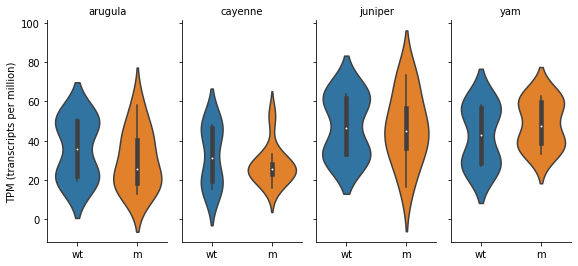

In [27]:
direct_targets_genes=['arugula','cayenne', 'juniper', 'yam']
sample2_data_tidy=data_tidy[data_tidy.gene.isin(direct_targets_genes)]
sample2_data_tidy


g2 = sns.catplot(x="genotype", y="TPM", col="gene", data=sample2_data_tidy, kind="violin", height=4, aspect=0.5, col_wrap=5)
g2.set_axis_labels("", "TPM (transcripts per million)")
g2.set_titles("{col_name}")
 

Instead of looking at the genoytpe (wt or m) lets explore the sex

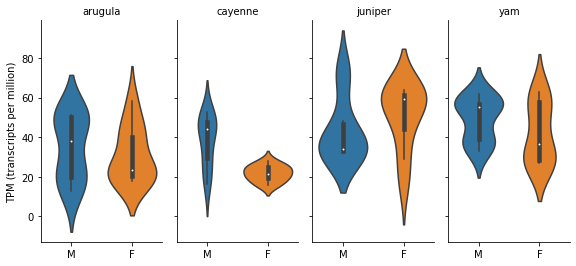

In [28]:

g3 = sns.catplot(x="sex", y="TPM", col="gene", data=sample2_data_tidy, kind="violin", height=4, aspect=0.5, col_wrap=5)
g3.set_axis_labels("", "TPM (transcripts per million)")
g3.set_titles("{col_name}")



Lets keep exploring and plot separetly the male and the females for the wild type and mutants - the top pannel is the female and the bottom  one is the male one

(please note that I tried to add separate graph titles using g5.set_title("gene of interests-Males") - I couldnt figure out how to do it but I would be grateful if you can indicate me how for next time)

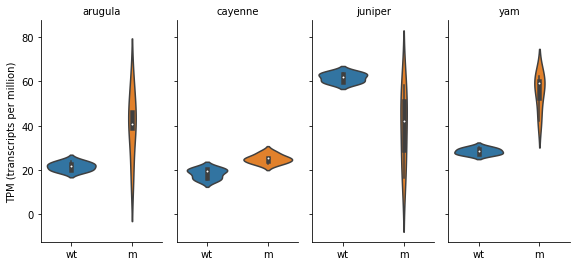

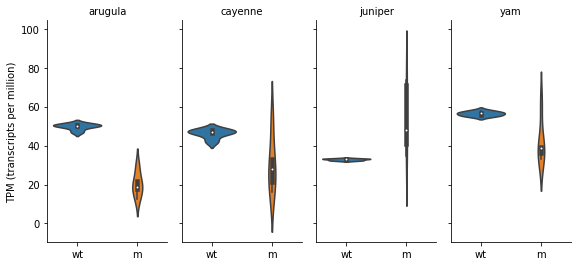

In [29]:
import matplotlib.pyplot as plt
direct_targets_genes=['arugula','cayenne', 'juniper', 'yam']
sampleF_data_tidy=sample2_data_tidy.loc[sample2_data_tidy['sex'] == 'F']
g4 = sns.catplot(x="genotype", y="TPM", col="gene", data=sampleF_data_tidy, kind="violin", height=4, aspect=0.5, col_wrap=5)
g4.set_axis_labels("", "TPM (transcripts per million)")
g4.set_titles("{col_name}")



direct_targets_genes=['arugula','cayenne', 'juniper', 'yam']
sampleM_data_tidy=sample2_data_tidy.loc[sample2_data_tidy['sex'] == 'M']
g5 = sns.catplot(x="genotype", y="TPM", col="gene", data=sampleM_data_tidy, kind="violin", height=4, aspect=0.5, col_wrap=5)
g5.set_axis_labels("", "TPM (transcripts per million)")
g5.set_titles("{col_name}")


At this point , I can clearly see that there is a clear difference in the distribution for the mutants cases - It is more spread where as the wt are closer to the mean.
What I want to do next is to see how the data points are actually spread. 

So it seems that the mutation of the Coriander, even if there is no significant effects on the mean expression of any sand mouse gene transcript, it definetly has an effect on the distribution(how spread are the different TPM). 

The reason why Lestrade’s lab thought that the mutation of the Coriander has no effect it is because they only ploted boxplot.

Lets use the 10 randomly selected gene and see if their mutants distribution is also affected 



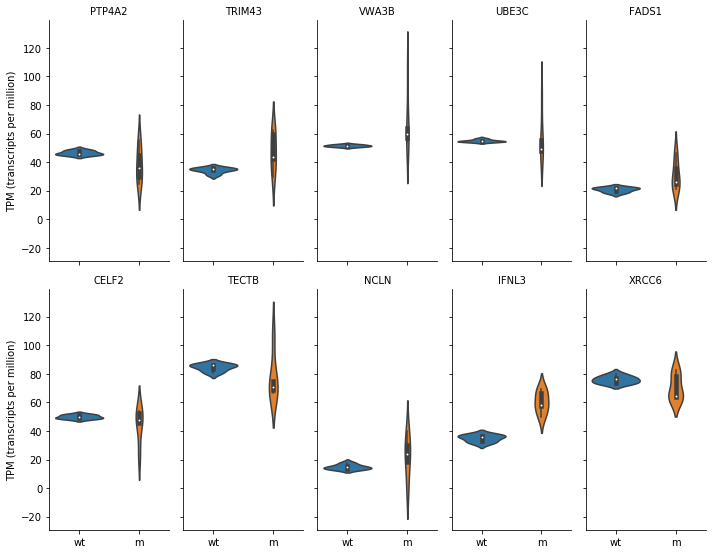

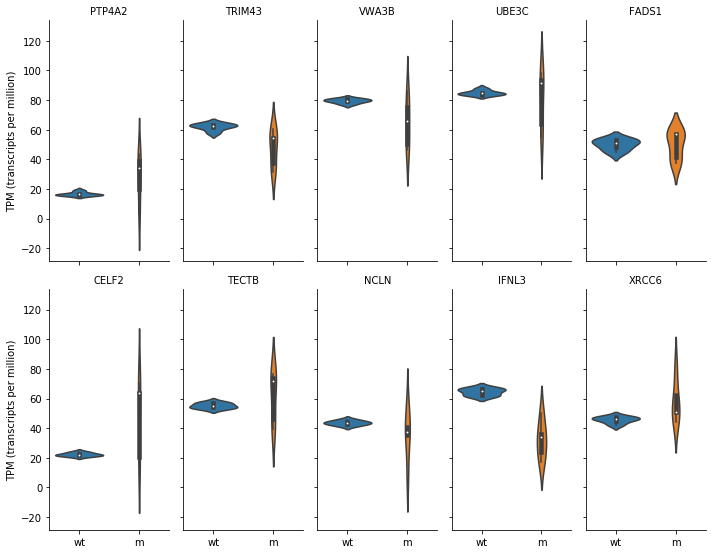

In [30]:
random_sample_M_data_tidy=random_sample_data_tidy.loc[random_sample_data_tidy['sex'] == 'M']
g_random = sns.catplot(x="genotype", y="TPM", col="gene", data=random_sample_M_data_tidy, kind="violin", height=4, aspect=0.5, col_wrap=5)
g_random.set_axis_labels("", "TPM (transcripts per million)")
g_random.set_titles("{col_name}")
random_sample_M_data_tidy=random_sample_data_tidy.loc[random_sample_data_tidy['sex'] == 'F']
g_random2 = sns.catplot(x="genotype", y="TPM", col="gene", data=random_sample_M_data_tidy, kind="violin", height=4, aspect=0.5, col_wrap=5)
g_random2.set_axis_labels("", "TPM (transcripts per million)")
g_random2.set_titles("{col_name}")

What we can see is that for some of the genes(but not all) have their distribution get more 'spread' for the mutants cases- This is expected because the deregulation of the coriander will affect multiple genes but not all of them.



The plot below is showing the distribution of all the mutants for the 4 selected genes(raw data)

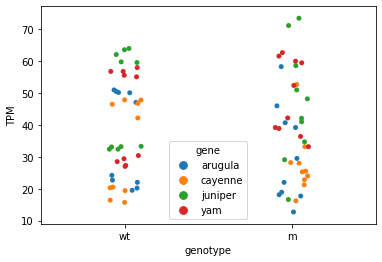

In [31]:
g7=sns.stripplot(x="genotype", y="TPM", hue="gene", data=sample2_data_tidy, jitter=True)

Lets look at the distribution of each gene separetly- I also colored them by sex 

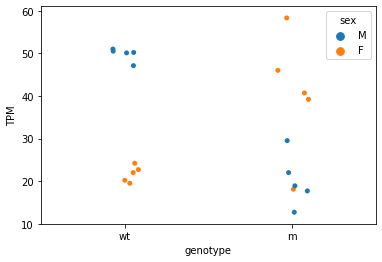

In [32]:
g7=sns.stripplot(x="genotype", y="TPM", hue="sex", data=sample2_data_tidy.loc[sample2_data_tidy['gene'] == 'arugula'], jitter=True)

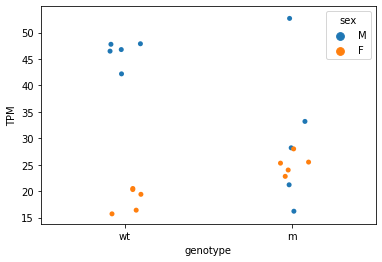

In [33]:
g8=sns.stripplot(x="genotype", y="TPM", hue="sex", data=sample2_data_tidy.loc[sample2_data_tidy['gene'] == 'cayenne'], jitter=True)

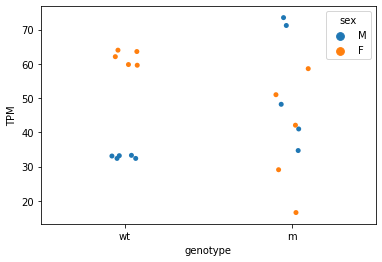

In [34]:
g9=sns.stripplot(x="genotype", y="TPM", hue="sex", data=sample2_data_tidy.loc[sample2_data_tidy['gene'] == 'juniper'], jitter=True)


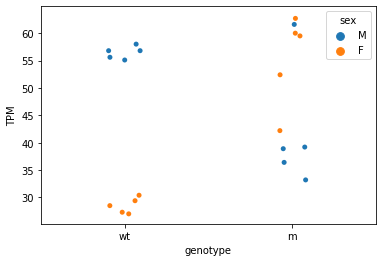

In [35]:
g10=sns.stripplot(x="genotype", y="TPM", hue="sex", data=sample2_data_tidy.loc[sample2_data_tidy['gene'] == 'yam'], jitter=True)

For those 4 genes we can see a clear difference when plotting what I can see is that the for a given gender and given gene, for the wild type, all replicates have similar gene expression(but different for different genes or different gender).
But for the mutants cases,it gets all "mixed-up", therefore , even if the mean might stay the same, each replicate has a dyregulated expression.
If the Coriander had no effect the right part of each stripplot plot (wt) would have been similar to the left part (m).
